**TANPA SAMPLING**

Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.95      0.91       125
    Positive       0.79      0.55      0.65        40

    accuracy                           0.85       165
   macro avg       0.83      0.75      0.78       165
weighted avg       0.85      0.85      0.85       165



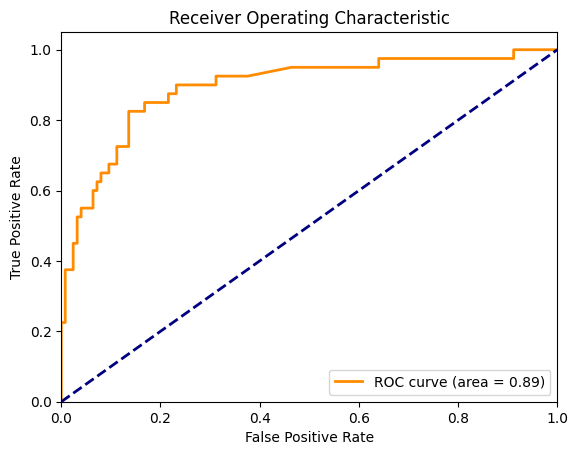

Accuracy: 85.45%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Baca dataset Anda
df = pd.read_csv('hasilpreproses.csv')

df['polarity_score'] = df['polarity_score'].apply(lambda x: 1 if x > 0 else 0)

# 4. Lakukan ekstraksi fitur teks dengan TF-IDF sebelum splitting data
tfidf_vectorizer = TfidfVectorizer(max_features=2000, max_df=0.75, min_df=5)  # Tambahkan max_df dan min_df
X_tfidf = tfidf_vectorizer.fit_transform(df['content_preprocessing'])

# 3. Bagi dataset menjadi data pelatihan (training) dan data pengujian (testing) setelah ekstraksi fitur TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['polarity_score'], test_size=0.1, random_state=42)

# 5. Latih model SVM
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

# 6. Hitung probabilitas untuk masing-masing kelas
y_score = svm_classifier.decision_function(X_test)

# 7. Hitung kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 8. Tampilkan kurva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# 9. Hitung dan tampilkan precision, recall, f1-score, dan support
y_pred = svm_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", classification_rep)

plt.show()

# 10. Hitung dan tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))


**UNDDERSAMPLING**

Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.84      0.81        38
    Positive       0.86      0.80      0.83        46

    accuracy                           0.82        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.82      0.82      0.82        84



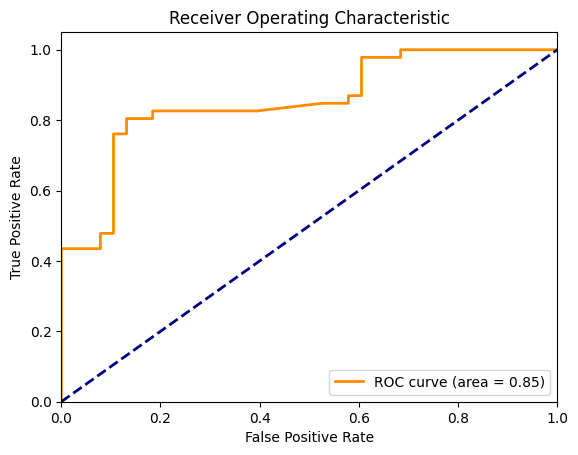

Accuracy: 82.14%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# 1. Baca dataset Anda
df = pd.read_csv('hasilpreproses.csv')

df['polarity_score'] = df['polarity_score'].apply(lambda x: 1 if x > 0 else 0)

# 2. Undersample data
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df['content_preprocessing'].values.reshape(-1, 1), df['polarity_score'])

# 3. Lakukan ekstraksi fitur teks dengan TF-IDF sebelum splitting data
tfidf_vectorizer = TfidfVectorizer(max_features=2000, max_df=0.75, min_df=5)  # Tambahkan max_df dan min_df
X_tfidf = tfidf_vectorizer.fit_transform(X_resampled.flatten())

# 4. Bagi dataset menjadi data pelatihan (training) dan data pengujian (testing) setelah ekstraksi fitur TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_resampled, test_size=0.1, random_state=42)

# 5. Latih model SVM
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

# 6. Hitung probabilitas untuk masing-masing kelas
y_score = svm_classifier.decision_function(X_test)

# 7. Hitung kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 8. Tampilkan kurva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# 9. Hitung dan tampilkan precision, recall, f1-score, dan support
y_pred = svm_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", classification_rep)

plt.show()

# 10. Hitung dan tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))


**OVERSAMPLER**

Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.90      0.90       121
    Positive       0.90      0.90      0.90       124

    accuracy                           0.90       245
   macro avg       0.90      0.90      0.90       245
weighted avg       0.90      0.90      0.90       245



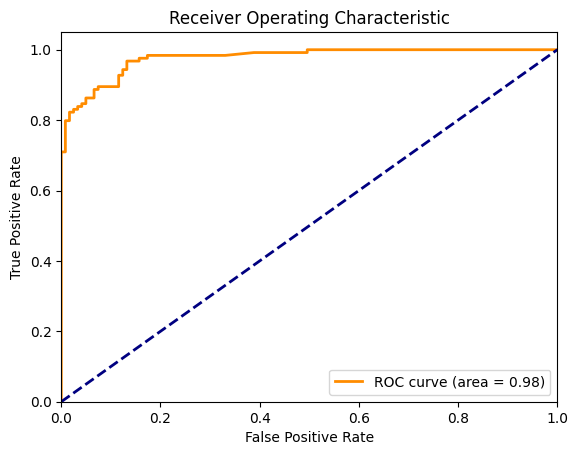

Accuracy: 89.80%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# 1. Baca dataset Anda
df = pd.read_csv('hasilpreproses.csv')

df['polarity_score'] = df['polarity_score'].apply(lambda x: 1 if x > 0 else 0)

# 2. Lakukan oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(df['content_preprocessing'].values.reshape(-1, 1), df['polarity_score'])

# 3. Lakukan ekstraksi fitur teks dengan TF-IDF sebelum splitting data
tfidf_vectorizer = TfidfVectorizer(max_features=2000, max_df=0.75, min_df=5)  # Tambahkan max_df dan min_df
X_tfidf = tfidf_vectorizer.fit_transform(X_resampled.flatten())

# 4. Bagi dataset menjadi data pelatihan (training) dan data pengujian (testing) setelah ekstraksi fitur TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_resampled, test_size=0.1, random_state=42)

# 5. Latih model SVM
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

# 6. Hitung probabilitas untuk masing-masing kelas
y_score = svm_classifier.decision_function(X_test)

# 7. Hitung kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 8. Tampilkan kurva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# 9. Hitung dan tampilkan precision, recall, f1-score, dan support
y_pred = svm_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", classification_rep)

plt.show()

# 10. Hitung dan tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))


**SMOOTE**

Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.83      0.89       104
    Positive       0.86      0.97      0.91       116

    accuracy                           0.90       220
   macro avg       0.91      0.90      0.90       220
weighted avg       0.91      0.90      0.90       220



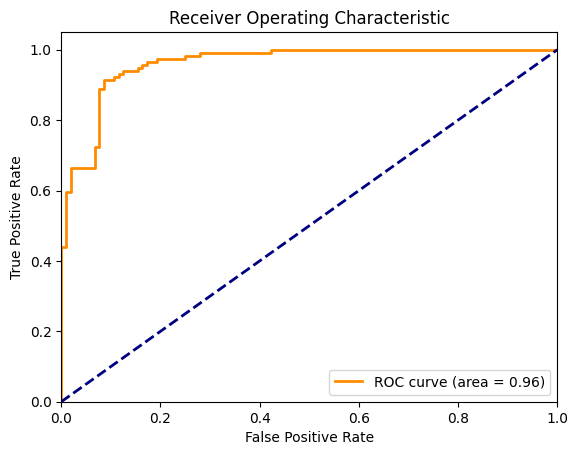

Accuracy: 90.00%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1. Baca dataset Anda
df = pd.read_csv('hasilpreproses.csv')

df['polarity_score'] = df['polarity_score'].apply(lambda x: 1 if x > 0 else 0)

# 2. Terapkan SMOTE pada data training
X_train, X_test, y_train, y_test = train_test_split(df['content_preprocessing'], df['polarity_score'], test_size=0.1, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=2000, max_df=0.75, min_df=5)
X_tfidf = tfidf_vectorizer.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_train)

# 3. Bagi dataset menjadi data pelatihan (training) dan data pengujian (testing) setelah ekstraksi fitur TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

# 4. Latih model SVM
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

# 5. Hitung probabilitas untuk masing-masing kelas
y_score = svm_classifier.decision_function(X_test)

# 6. Hitung kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 7. Tampilkan kurva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# 8. Hitung dan tampilkan precision, recall, f1-score, dan support
y_pred = svm_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", classification_rep)

plt.show()

# 9. Hitung dan tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))


Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.83      0.89       104
    Positive       0.86      0.97      0.91       116

    accuracy                           0.90       220
   macro avg       0.91      0.90      0.90       220
weighted avg       0.91      0.90      0.90       220



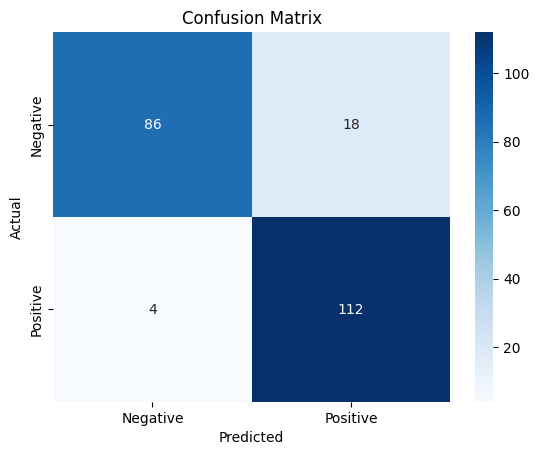

Accuracy: 90.00%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Baca dataset Anda
df = pd.read_csv('hasilpreproses.csv')

df['polarity_score'] = df['polarity_score'].apply(lambda x: 1 if x > 0 else 0)

# 2. Terapkan SMOTE pada data training
X_train, X_test, y_train, y_test = train_test_split(df['content_preprocessing'], df['polarity_score'], test_size=0.1, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=2000, max_df=0.75, min_df=5)
X_tfidf = tfidf_vectorizer.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_train)

# 3. Bagi dataset menjadi data pelatihan (training) dan data pengujian (testing) setelah ekstraksi fitur TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

# 4. Latih model SVM
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

# 5. Hitung probabilitas untuk masing-masing kelas
y_score = svm_classifier.decision_function(X_test)

# 8. Hitung dan tampilkan precision, recall, f1-score, dan support
y_pred = svm_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", classification_rep)

# 9. Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. Hitung dan tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))


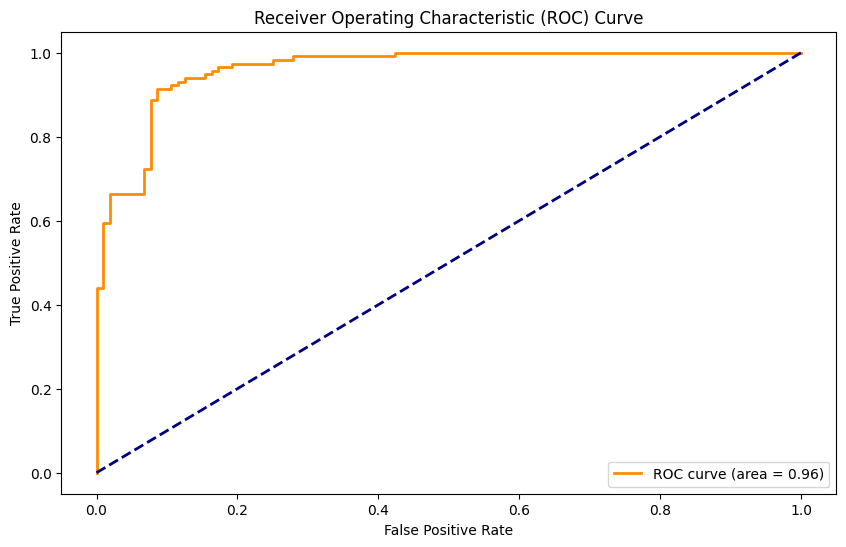

AUC: 0.96
Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.83      0.89       104
    Positive       0.86      0.97      0.91       116

    accuracy                           0.90       220
   macro avg       0.91      0.90      0.90       220
weighted avg       0.91      0.90      0.90       220



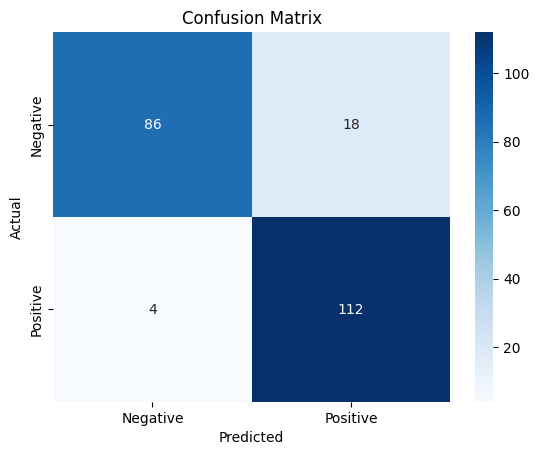

Accuracy: 90.00%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Baca dataset Anda
df = pd.read_csv('hasilpreproses.csv')

df['polarity_score'] = df['polarity_score'].apply(lambda x: 1 if x > 0 else 0)

# 2. Terapkan SMOTE pada data training
X_train, X_test, y_train, y_test = train_test_split(df['content_preprocessing'], df['polarity_score'], test_size=0.1, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=2000, max_df=0.75, min_df=5)
X_tfidf = tfidf_vectorizer.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_train)

# 3. Bagi dataset menjadi data pelatihan (training) dan data pengujian (testing) setelah ekstraksi fitur TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

# 4. Latih model SVM
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

# 5. Hitung probabilitas untuk masing-masing kelas
y_scores = svm_classifier.predict_proba(X_test)[:, 1]

# 6. Hitung False Positive Rate, True Positive Rate, dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# 7. Tampilkan ROC grafik
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 8. Tampilkan AUC
print("AUC: {:.2f}".format(roc_auc))

# 9. Hitung dan tampilkan precision, recall, f1-score, dan support
y_pred = svm_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", classification_rep)

# 10. Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 11. Hitung dan tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))
